## 12월 이후의 데이터는 신뢰성에 문제가 있다.

In [67]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
from my_function import to_hour_category
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.display.max_columns = None

def make_pie_chart(arg_df, arg_label, arg_value, arg_title):
    fig, ax = plt.subplots(1, 1, figsize=(15, 9))
    fig.suptitle(arg_title, fontsize=22)
    fig.subplots_adjust(left=0.125, bottom=0., right=0.9, top=0.9, wspace=0.2, hspace=0.4)
    sns.axes_style(style='darkgrid')

    # 들어갈 라벨
    labels=arg_df[arg_label]

    # 색설정 및 몇개 색이 필요한지 len값으로 설정
    colors = sns.color_palette('rainbow_r',len(arg_df[arg_label]))

    # 하얀색 테두리 그리기
    wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

    # price에 대한 파이나누기(소숫점 둘째점까지 표현)
    plt.pie(arg_df[arg_value], autopct = "%1.2f%%", pctdistance=0.7,
    startangle=7, counterclock=False, shadow=True, colors=colors, wedgeprops=wedgeprops)
    plt.legend(labels, fontsize = 12, loc = 'upper right')
    plt.show()

def load_data():
    # 데이터 불러오기
    df = pd.read_pickle("../../discarded_data/groupby_time_data.pkl")

    # 시간대 변수 두가지 생성(general, specific)
    df["general_time_category"] = df["hour"].apply(to_hour_category, args=([6,12,18,24],))
    df["specific_time_category"] = df["hour"].apply(to_hour_category, args=([4,10,16,22],))
    columns = df.columns.to_list()
    columns.insert(0, columns.pop())
    columns.insert(0, columns.pop())
    df = df[columns]

    # 시간별 결제 인원의 비율    
    df["no_of_view_to_purchase_user"] = df["no_of_purchase_user"] / df["no_of_total_user"]
    # 시간별 장바구니에 담은 인원의 비율
    df["no_of_view_to_cart_user"] = df["no_of_cart_user"] / df["no_of_total_user"]
    # 시간별 장바구니에 담은 인원대비 결제하는 비중
    df["no_of_cart_to_purchase_user"] = df["no_of_purchase_user"] / df["no_of_cart_user"]

    # 방문이나 장바구니 담기는 있어도 단 한번의 결제 로그도 없는 날자가 존재한다. 해당 날자의 값은 이상치로 생각하고 제거한다.
    # 제거되는 날 11월 15일, 1월 2일
    drop_index = df[(df["month"] == 11) & (df["day"] == 15)].index
    df = df.drop(drop_index)
    drop_index = df[(df["month"] == 1) & (df["day"] == 2)].index
    df = df.drop(drop_index)
    return df
df = load_data()
df.head(3)    

,general_time_category,specific_time_category,time,week_day,year,month,day,hour,event_type_view,event_type_purchase,event_type_cart,event_type_total,total_sales,no_of_total_user,no_of_cart_user,no_of_purchase_user,purchase_of_missing,purchase_of_electronics.clocks,purchase_of_electronics.video.tv,purchase_of_appliances.personal.massager,purchase_of_apparel.shoes,purchase_of_sport.bicycle,purchase_of_electronics.audio.headphone,purchase_of_construction.tools.light,purchase_of_electronics.smartphone,sales_of_missing,sales_of_electronics.clocks,sales_of_electronics.video.tv,sales_of_computers.notebook,sales_of_appliances.personal.massager,sales_of_sport.bicycle,sales_of_electronics.audio.headphone,sales_of_construction.tools.light,sales_of_appliances.kitchen.refrigerators,sales_of_electronics.smartphone,purchase_of_st_accessories,purchase_of_st_missing,purchase_of_st_stationery,purchase_of_st_country_yard,purchase_of_st_computers,purchase_of_st_apparel,purchase_of_st_kids,purchase_of_st_furniture,purchase_of_st_electronics,purchase_of_st_auto,purchase_of_st_appliances,purchase_of_st_sport,purchase_of_st_medicine,purchase_of_st_construction,sales_of_st_accessories,sales_of_st_missing,sales_of_st_stationery,sales_of_st_country_yard,sales_of_st_computers,sales_of_st_apparel,sales_of_st_kids,sales_of_st_furniture,sales_of_st_electronics,sales_of_st_auto,sales_of_st_appliances,sales_of_st_sport,sales_of_st_medicine,sales_of_st_construction,cart_of_missing,cart_of_electronics.clocks,cart_of_appliances.kitchen.washer,cart_of_electronics.video.tv,cart_of_appliances.personal.massager,cart_of_apparel.shoes,cart_of_sport.bicycle,cart_of_electronics.audio.headphone,cart_of_construction.tools.light,cart_of_electronics.smartphone,cart_of_st_accessories,cart_of_st_missing,cart_of_st_stationery,cart_of_st_country_yard,cart_of_st_computers,cart_of_st_apparel,cart_of_st_kids,cart_of_st_furniture,cart_of_st_electronics,cart_of_st_auto,cart_of_st_appliances,cart_of_st_sport,cart_of_st_medicine,cart_of_st_construction,view_of_missing,view_of_electronics.clocks,view_of_electronics.video.tv,view_of_computers.notebook,view_of_appliances.personal.massager,view_of_apparel.shoes,view_of_sport.bicycle,view_of_electronics.audio.headphone,view_of_construction.tools.light,view_of_appliances.kitchen.refrigerators,view_of_electronics.smartphone,view_of_st_accessories,view_of_st_missing,view_of_st_stationery,view_of_st_country_yard,view_of_st_computers,view_of_st_apparel,view_of_st_kids,view_of_st_furniture,view_of_st_electronics,view_of_st_auto,view_of_st_appliances,view_of_st_sport,view_of_st_medicine,view_of_st_construction,no_of_view_to_purchase_user,no_of_view_to_cart_user,no_of_cart_to_purchase_user
0,0,1,2019-10-01 04:00:00,1,2019,10,1,4,1070,10,3,1083,2387.84,383,3.0,9.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,4.0,29.51,0.00,0.00,0.00,0.0,0.0,523.45,0.0,0.00,1752.43,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,7.0,0.0,1.0,0.0,0.0,0.0,0.00,29.51,0.0,0.0,0.00,0.00,0.00,54.42,2275.88,0.00,28.03,0.0,0.0,0.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,390,20.0,12.0,31.0,0.0,11.0,0.0,32.0,0.0,22.0,301.0,1.0,390,0.0,0.0,60,27,4.0,26.0,379,9.0,156,1.0,0.0,17,0.023499,0.007833,3.000000
1,0,1,2019-10-01 05:00:00,1,2019,10,1,5,121,0,0,121,0.00,102,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37,9.0,3.0,7.0,0.0,1.0,0.0,3.0,0.0,0.0,38.0,0.0,37,0.0,0.0,10,2,0.0,1.0,56,2.0,8,0.0,1.0,4,0.000000,0.000000,NaN
2,1,1,2019-10-01 06:00:00,1,2019,10,1,6,22326,316,244,22886,85533.96,5378,156.0,268.0,75.0,8.0,5.0,0.0,2.0,0.0,12.0,0.0,152.0,8548.75,1696.67,1891.97,3378.55,0.0,0.0,848.63,0.0,1774.82,61223.66,3.0,75.0,1.0,0.0,13.0,3.0,1.0,4.0,184.0,2.0,28.0,0.0,0.0,2.0,301.17,8548.75,7.7,0.0,

In [68]:
# 구매한 로그의 카테고리의 비중은 월마다 다르다
# 시각화
temp_df = df.groupby("month").sum().iloc[:,15:23].T
temp_df = temp_df/temp_df.sum() * 100
temp_df = temp_df.T
temp_df = temp_df.reset_index()
temp_df["month"] = temp_df["month"].apply(lambda x : x + 12 if x < 10 else x)
#temp_df = temp_df.set_index("month")
temp_df = temp_df.sort_values("month")
temp_df["month"] = temp_df["month"].apply(lambda x : f"{x - 12}월" if x > 12 else f"{x}월")
fig = go.Figure()
for category in temp_df.columns[1:]:
    fig.add_trace(go.Scatter(y=temp_df[category], x=temp_df["month"],mode='lines+markers',  name=f"{category.split('_')[-1]}"))                                                                                 
fig.update_layout(autosize=False,title = "결제 로그의 월별 카테고리 비중",width=900,height=450,)
fig.show()
del temp_df

![](./images/purchase_ratio_by_category.png)

데이터를 확인해보니 스마트폰이 전체 결제로그에서 차지하는 비중은 12월부터 급감하고 construction.tools.light는 12월부터 급등한다.

12월부터 어떤 construction.tools.light 브랜드의 제품이 팔렸는가 확인해보도록한다.

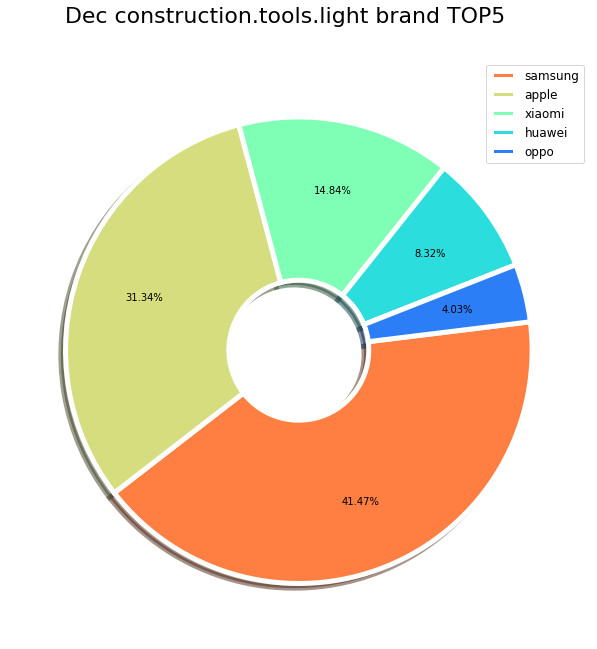

In [69]:
# 12월에 팔린 로그만 모아둔 데이터를 불러와서 브랜드를 확인해보자
df = pd.read_parquet("../../discarded_data/purchase_2019-Dec.parquet.gzip")
temp_df = df[df["category_code"] == "construction.tools.light"]["brand"].value_counts()[:5] * 100
temp_df = pd.DataFrame(temp_df).reset_index()
make_pie_chart(temp_df, "index", "brand", "Dec construction.tools.light brand TOP5")

스마트폰 브랜드가 많이 나와있다.

category_code가 스마트폰과 뒤바뀐건지 확인하기위해 스마트폰 카테고리를 확인해본다.

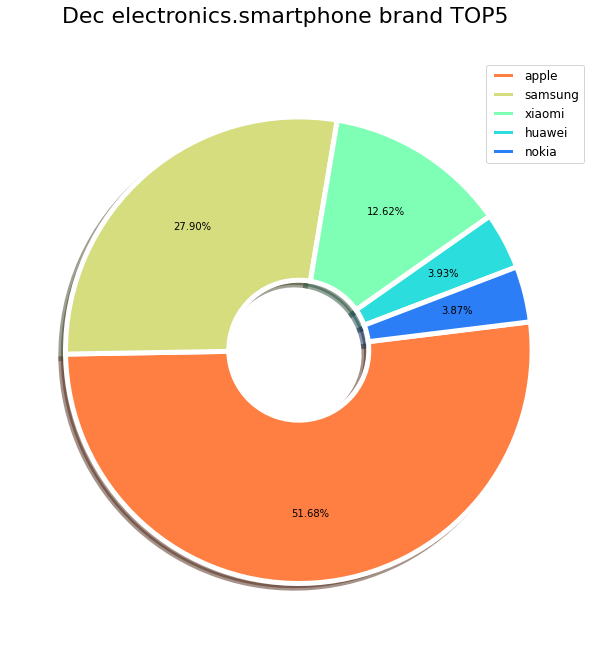

In [70]:
temp_df = df[df["category_code"] == "electronics.smartphone"]["brand"].value_counts()[:5]
temp_df = pd.DataFrame(temp_df).reset_index()
make_pie_chart(temp_df, "index", "brand", "Dec electronics.smartphone brand TOP5")

스마트폰 브랜드는 정상적으로 나온다. 따라서 construction.tools.light 의 데이터는 신뢰할 수 없다.

다른 카테고리를 추가로 살펴보자

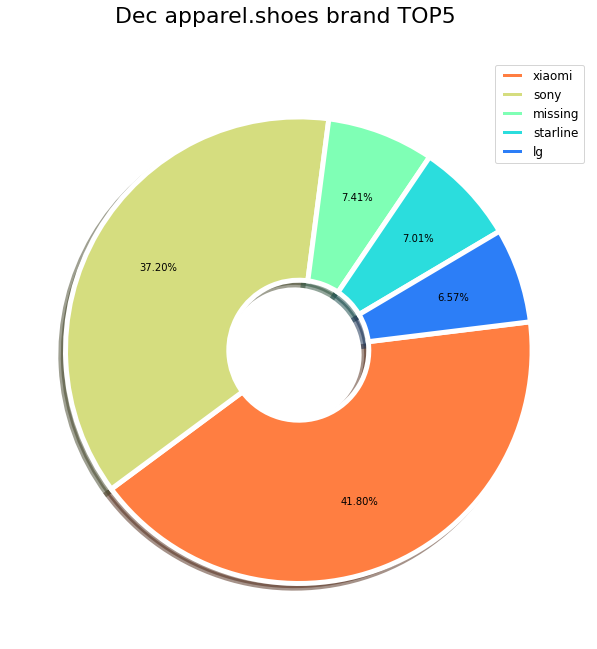

In [71]:
temp_df = df[df["category_code"] == "apparel.shoes"]["brand"].value_counts()[:5]
temp_df = pd.DataFrame(temp_df).reset_index()
make_pie_chart(temp_df, "index", "brand", "Dec apparel.shoes brand TOP5")

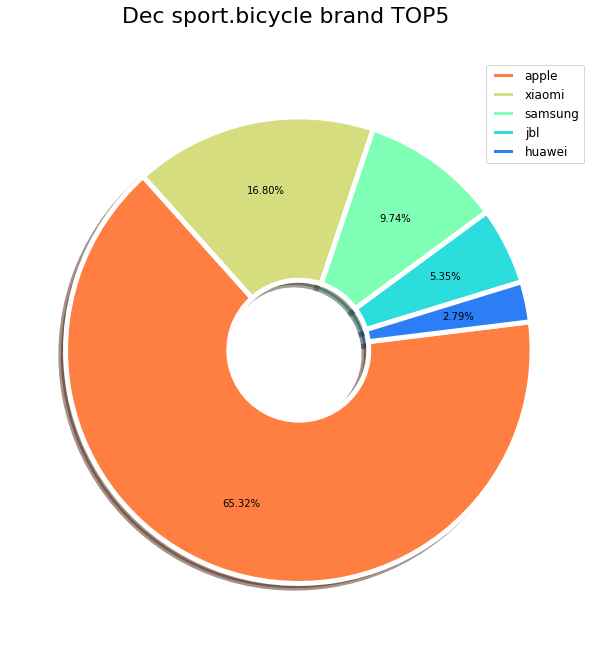

In [72]:
temp_df = df[df["category_code"] == "sport.bicycle"]["brand"].value_counts()[:5]
temp_df = pd.DataFrame(temp_df).reset_index()
make_pie_chart(temp_df, "index", "brand", "Dec sport.bicycle brand TOP5")

12월 데이터는 신뢰할 수 없다.

12월 이후의 데이터에서도 동일한 문제가 나타나는지 확인한다.

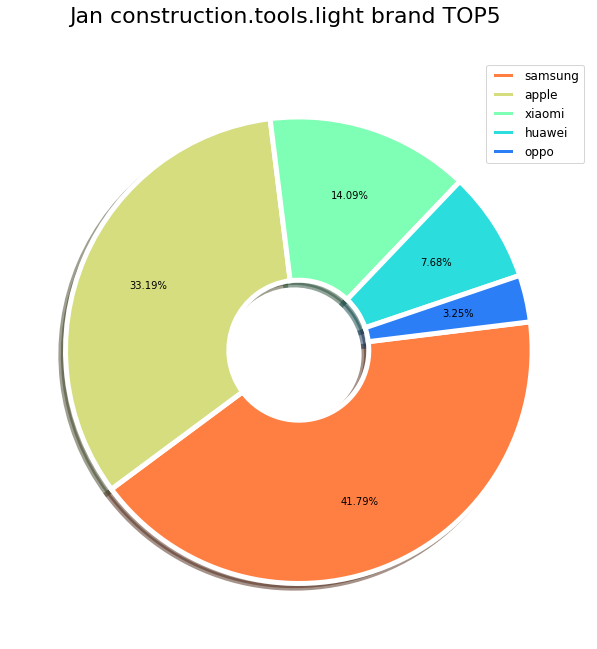

In [73]:
df = pd.read_parquet("../../discarded_data/purchase_2020-Jan.parquet.gzip")
temp_df = df[df["category_code"] == "construction.tools.light"]["brand"].value_counts()[:5]
temp_df = pd.DataFrame(temp_df).reset_index()
make_pie_chart(temp_df, "index", "brand", "Jan construction.tools.light brand TOP5")

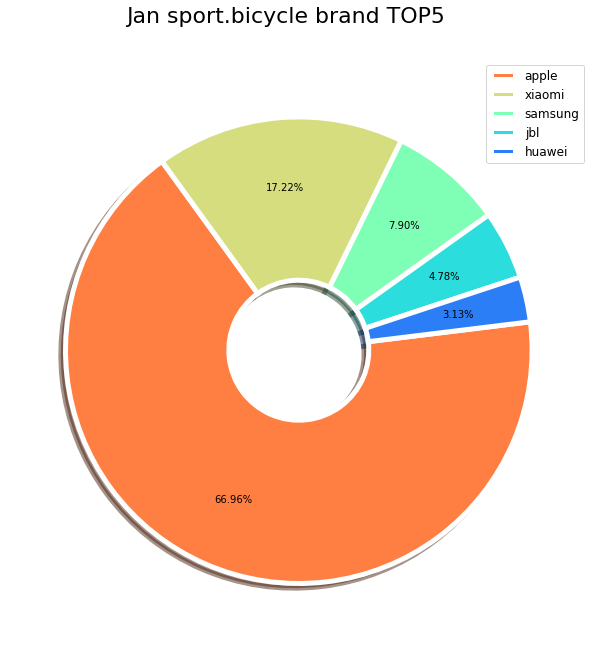

In [74]:
temp_df = df[df["category_code"] == "sport.bicycle"]["brand"].value_counts()[:5]
temp_df = pd.DataFrame(temp_df).reset_index()
make_pie_chart(temp_df, "index", "brand", "Jan sport.bicycle brand TOP5")

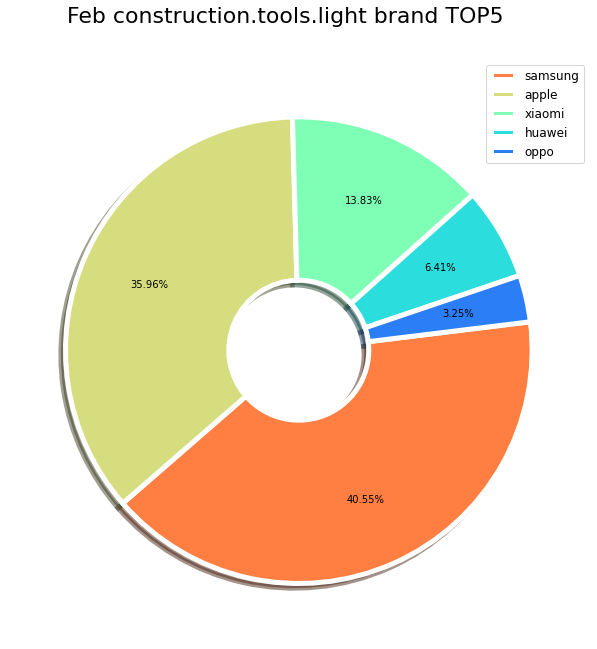

In [75]:
df = pd.read_parquet("../../discarded_data/purchase_2020-Feb.parquet.gzip")
temp_df = df[df["category_code"] == "construction.tools.light"]["brand"].value_counts()[:5]
temp_df = pd.DataFrame(temp_df).reset_index()
make_pie_chart(temp_df, "index", "brand", "Feb construction.tools.light brand TOP5")

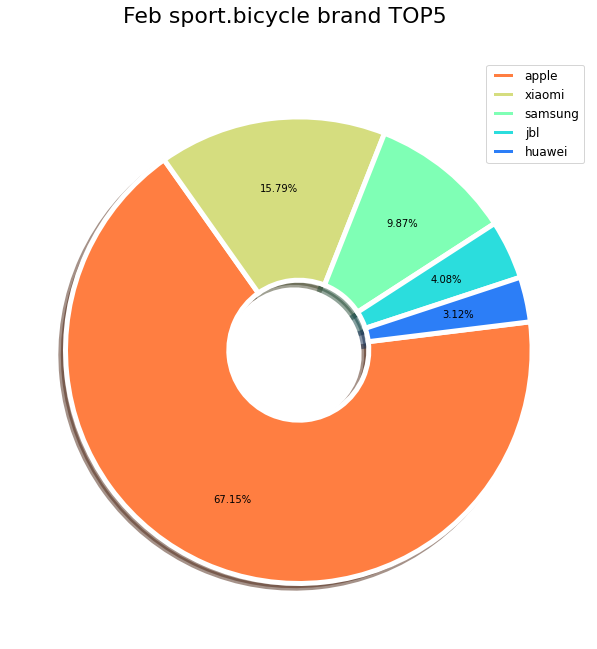

In [76]:
temp_df = df[df["category_code"] == "sport.bicycle"]["brand"].value_counts()[:5]
temp_df = pd.DataFrame(temp_df).reset_index()
make_pie_chart(temp_df, "index", "brand", "Feb sport.bicycle brand TOP5")

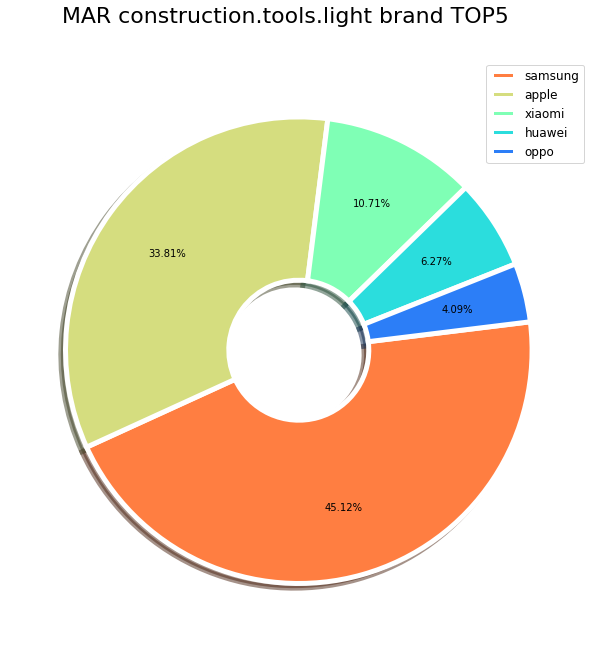

In [77]:
df = pd.read_parquet("../../discarded_data/purchase_2020-MAR.parquet.gzip")
temp_df = df[df["category_code"] == "construction.tools.light"]["brand"].value_counts()[:5]
temp_df = pd.DataFrame(temp_df).reset_index()
make_pie_chart(temp_df, "index", "brand", "MAR construction.tools.light brand TOP5")

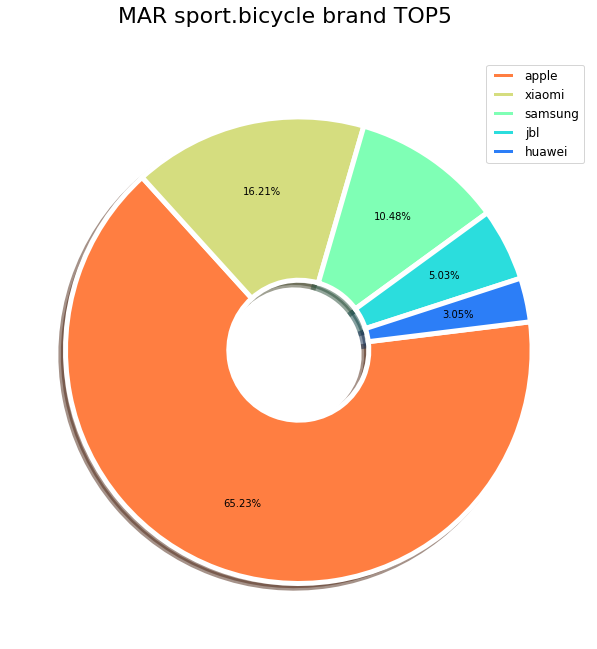

In [78]:
temp_df = df[df["category_code"] == "sport.bicycle"]["brand"].value_counts()[:5]
temp_df = pd.DataFrame(temp_df).reset_index()
make_pie_chart(temp_df, "index", "brand", "MAR sport.bicycle brand TOP5")

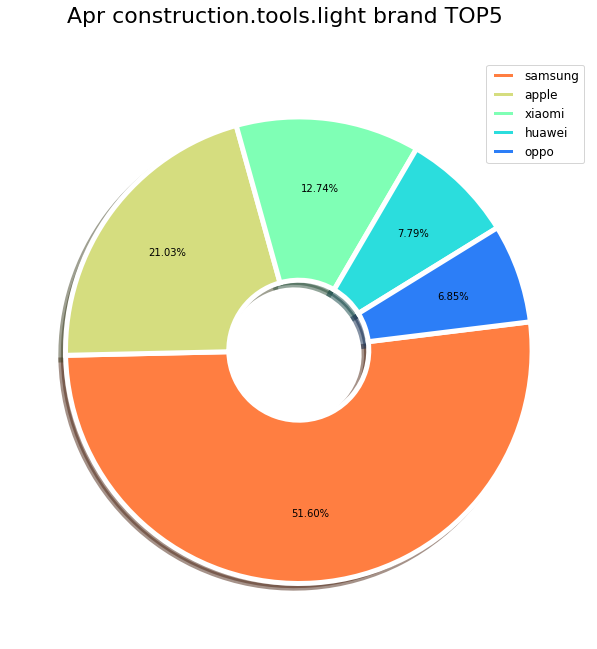

In [79]:
df = pd.read_parquet("../../discarded_data/purchase_2020-Apr.parquet.gzip")
temp_df = df[df["category_code"] == "construction.tools.light"]["brand"].value_counts()[:5]
temp_df = pd.DataFrame(temp_df).reset_index()
make_pie_chart(temp_df, "index", "brand", "Apr construction.tools.light brand TOP5")

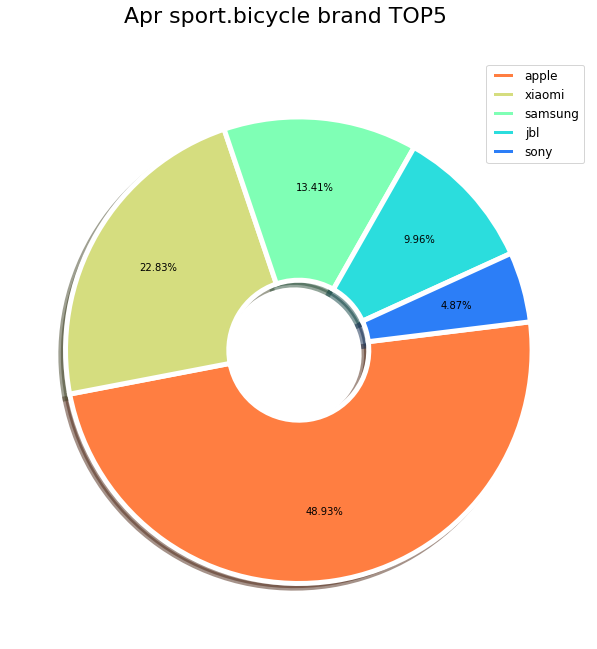

In [80]:
temp_df = df[df["category_code"] == "sport.bicycle"]["brand"].value_counts()[:5]
temp_df = pd.DataFrame(temp_df).reset_index()
make_pie_chart(temp_df, "index", "brand", "Apr sport.bicycle brand TOP5")

12월 이후의 로그 데이터는 구매된 상품의 카테고리 혹은 브랜드에 문제가 있다.

따라서 분석에서 사용하지 않는다.